In [559]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [511]:
test = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [512]:
test.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [513]:
pd.set_option('display.max_rows', 85)
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


In [514]:
potential_features = ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'Employment',  
                      'EdLevel', 'UndergradMajor', 'EduOther', 'DevType', 'YearsCode', 'YearsCodePro', 
                      'FizzBuzz', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
                      'WorkRemote', 'LanguageWorkedWith', 'ITperson', 'Age', 'Gender', 'Ethnicity']

potential questions and EDA

Meaningful questions and answers
1. Does education level affect your income?
2. Does age affect your income?
3. Are there any statistical differences between being a mainbranch, a hobbyist, ITperson
4. The more the better? (languages)
5. Does the amount of hours you work affect your income? What if you work remote?

heatmap

Viz
1. Age & Income
2. Gender distribution bar graph
3. WorkWeekHrs & Income
4. Ethnicity distribution

Stat test
1. MainBranch 
2. Gender Income
3. EdLevel
4. hobbyist
5. ITperson

fizzbuzz 



Final MODEL:









v?

In [515]:
US = test[test['Country']=='United States']

In [516]:
us_devs = US[potential_features]

In [517]:
us_devs.dropna(inplace=True)

<ipython-input-517-68f3d50c0459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_devs.dropna(inplace=True)


In [518]:
us_devs.shape

(12206, 22)

In [519]:
us_dev_workers = us_devs[us_devs['Employment']=='Employed full-time']

In [520]:
ft = us_dev_workers['CompTotal'] != 0

In [521]:
dev_df = us_dev_workers[ft]

In [522]:
dev_df.shape

(11485, 22)

In [523]:
weekly = dev_df['CompFreq'] == 'Weekly'
monthly = dev_df['CompFreq'] == 'Monthly'

In [312]:
#dev_df[weekly]['CompTotal'].apply(lambda x: x*52 if x<2000 else x)

In [311]:
#dev_df[monthly]['CompTotal'].apply(lambda x: x*12 if x<8000 else x)

In [524]:
dev_df.reset_index(drop=True, inplace=True)

In [525]:
dev_df

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,EdLevel,UndergradMajor,EduOther,DevType,YearsCode,...,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,LanguageWorkedWith,ITperson,Age,Gender,Ethnicity
0,4,I am a developer by profession,No,Never,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Developer, full-stack",3,...,61000.0,Yearly,61000.0,80.0,Less than once per month / Never,C;C++;C#;Python;SQL,SIGH,22.0,Man,White or of European descent
1,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,Data or business analyst;Database administrato...,17,...,90000.0,Yearly,90000.0,40.0,All or almost all the time (I'm full-time remote),Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Yes,28.0,Man,White or of European descent
2,23,I am a developer by profession,Yes,Less than once per year,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,"Developer, full-stack",3,...,69000.0,Yearly,69000.0,40.0,A few days each month,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,SIGH,22.0,Man,Black or of African descent
3,32,I am a developer by profession,No,Never,Employed full-time,Associate degree,"Information systems, information technology, o...",Completed an industry certification program (e...,"Developer, full-stack",3,...,22000.0,Weekly,1100000.0,37.0,Less than once per month / Never,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,SIGH,21.0,Man,White or of European descent
4,35,I am a developer by profession,No,Never,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken a part-time in-person course in programm...,"Developer, front-end",14,...,80000.0,Yearly,80000.0,40.0,Less than once per month / Never,HTML/CSS;JavaScript,"Fortunately, someone else has that title",35.0,Woman,Black or of African descent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11480,88865,I am a developer by profession,No,Less than once a month but more than once per ...,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...",Taken an online course in programming or softw...,"Developer, front-end",15,...,120000.0,Yearly,120000.0,35.0,"Less than half the time, but at least one day ...",HTML/CSS;JavaScript,Also Yes,36.0,Man,White or of European descent
11481,88874,I am a developer by profession,Yes,Once a month or more often,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...",Taken an online course in programming or softw...,Data scientist or machine learning specialist;...,7,...,185000.0,Weekly,2000000.0,50.0,About half the time,C++;Python;Scala;SQL,Yes,26.0,Man,White or of European descent
11482,88876,I am a developer by profession,Yes,Never,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,"Developer, back-end;Developer, game or graphics",8,...,180000.0,Yearly,180000.0,40.0,"Less than half the time, but at least one day ...",Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...,SIGH,23.0,Man,White or of European descent
11483,88877,I am a developer by profession,Yes,Less than once per year,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,Data scientist or machine learning specialist;...,31,...,239000.0,Weekly,2000000.0,45.0,Less than once per month / Never,Bash/Shell/PowerShell;C;Clojur

In [528]:
dev_df.rename(columns={'MainBranch':'FullDev'}, inplace=True)

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [529]:
dev_df['FullDev'].replace({'I am a developer by profession': 1, 'I am not primarily a developer, but I write code sometimes as part of my work': 0}, inplace=True)

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [530]:
dev_df.rename(columns={'ConvertedComp':'Salary'}, inplace=True)

In [531]:
dev_df['Gender'].replace({'Woman': 1, 'Man': 0}, inplace=True)

In [532]:
dev_df['FizzBuzz'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [533]:
dev_df['Hobbyist'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [534]:
dev_df['YearsCode'].replace('Less than 1 year', 1, inplace=True)
dev_df['YearsCodePro'].replace('Less than 1 year', 1, inplace=True)
dev_df['YearsCodePro'].replace('More than 50 years', 50, inplace=True)
dev_df['YearsCode'].replace('More than 50 years', 50, inplace=True)

In [535]:
dev_df['YearsCode'] = dev_df['YearsCode'].astype(int)

<ipython-input-535-3c9699bbf70e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df['YearsCode'] = dev_df['YearsCode'].astype(int)


In [536]:
dev_df['YearsCodePro'] = dev_df['YearsCodePro'].astype(int)

<ipython-input-536-263e6ee326a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df['YearsCodePro'] = dev_df['YearsCodePro'].astype(int)


In [537]:
dev_df['YearsCode'][3]

3

In [539]:
dev_df['FullDev'].value_counts()

1    10439
0     1046
Name: FullDev, dtype: int64

In [541]:
dev_df.groupby('FullDev')['CompTotal'].mean()

FullDev
0    109890.949331
1    120741.763100
Name: CompTotal, dtype: float64

In [542]:
dev_df.groupby('Hobbyist')['CompTotal'].mean()

Hobbyist
0    116436.051985
1    120649.847711
Name: CompTotal, dtype: float64

In [543]:
dev_df.groupby('OpenSourcer')['CompTotal'].mean()

OpenSourcer
Less than once a month but more than once per year    128386.678971
Less than once per year                               120770.534278
Never                                                 106752.214876
Once a month or more often                            142827.892148
Name: CompTotal, dtype: float64

In [544]:
dev_df.columns

Index(['Respondent', 'FullDev', 'Hobbyist', 'OpenSourcer', 'Employment',
       'EdLevel', 'UndergradMajor', 'EduOther', 'DevType', 'YearsCode',
       'YearsCodePro', 'FizzBuzz', 'CompTotal', 'CompFreq', 'Salary',
       'WorkWeekHrs', 'WorkRemote', 'LanguageWorkedWith', 'ITperson', 'Age',
       'Gender', 'Ethnicity'],
      dtype='object')

In [545]:
dev_df['WorkRemote']

0                         Less than once per month / Never
1        All or almost all the time (I'm full-time remote)
2                                    A few days each month
3                         Less than once per month / Never
4                         Less than once per month / Never
                               ...                        
11480    Less than half the time, but at least one day ...
11481                                  About half the time
11482    Less than half the time, but at least one day ...
11483                     Less than once per month / Never
11484                                A few days each month
Name: WorkRemote, Length: 11485, dtype: object

In [546]:
dev_df['LanguageWorkedWith'].unique()

array(['C;C++;C#;Python;SQL',
       'Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL;TypeScript',
       'Bash/Shell/PowerShell;HTML/CSS;JavaScript;Python;Ruby;SQL', ...,
       'C++;Python;Scala;SQL',
       'Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;R;Scala',
       'Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;Scala;Swift;Other(s):'],
      dtype=object)

In [547]:
dev_df['LanguageWorkedWith']

0                                      C;C++;C#;Python;SQL
1        Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
2        Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...
3        Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
4                                      HTML/CSS;JavaScript
                               ...                        
11480                                  HTML/CSS;JavaScript
11481                                 C++;Python;Scala;SQL
11482    Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...
11483    Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;...
11484                 HTML/CSS;JavaScript;Scala;TypeScript
Name: LanguageWorkedWith, Length: 11485, dtype: object

In [548]:
num = []
for i in range(len(dev_df)):
    num.append(dev_df['LanguageWorkedWith'][i].count(';')+1)

In [549]:
dev_df['num_language'] = num

<ipython-input-549-1dad04d20bc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df['num_language'] = num


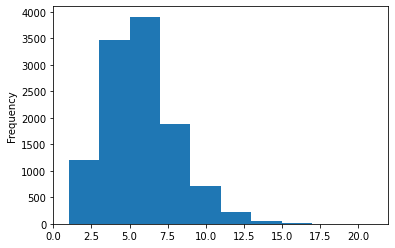

In [550]:
dev_df['num_language'].plot(kind='hist')

In [551]:
dev_df.columns

Index(['Respondent', 'FullDev', 'Hobbyist', 'OpenSourcer', 'Employment',
       'EdLevel', 'UndergradMajor', 'EduOther', 'DevType', 'YearsCode',
       'YearsCodePro', 'FizzBuzz', 'CompTotal', 'CompFreq', 'Salary',
       'WorkWeekHrs', 'WorkRemote', 'LanguageWorkedWith', 'ITperson', 'Age',
       'Gender', 'Ethnicity', 'num_language'],
      dtype='object')

In [552]:
developer = dev_df['DevType'].str.contains('Developer')
data_scientist = dev_df['DevType'].str.contains('Data')

In [553]:
dev_df[developer]['DevType'].count()

10377

In [554]:
dev_df[data_scientist]['DevType'].count()

2462

In [555]:
dev_df.drop(columns=['Employment', 'EduOther', 'CompTotal', 'CompFreq', 'YearsCode'], inplace=True)

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [556]:
dev_df.head()

,Respondent,FullDev,Hobbyist,OpenSourcer,EdLevel,UndergradMajor,DevType,YearsCodePro,FizzBuzz,Salary,WorkWeekHrs,WorkRemote,LanguageWorkedWith,ITperson,Age,Gender,Ethnicity,num_language
0,4,1,0,Never,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Developer, full-stack",1,0,61000.0,80.0,Less than once per month / Never,C;C++;C#;Python;SQL,SIGH,22.0,0,White or of European descent,5
1,13,1,1,Less than once a month but more than once per ...,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,8,1,90000.0,40.0,All or almost all the time (I'm full-time remote),Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Yes,28.0,0,White or of European descent,6
2,23,1,1,Less than once per year,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...","Developer, full-stack",1,0,69000.0,40.0,A few days each month,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,SIGH,22.0,0,Black or of African descent,6
3,32,1,0,Never,Associate degree,"Information systems, information technology, o...","Developer, full-stack",2,0,1100000.0,37.0,Less than once per month / Never,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,SIGH,21.0,0,White or of European descent,5
4,35,1,0,Never,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...","Developer, front-end",14,0,80000.0,40.0,Less than once per month / Never,HTML/CSS;JavaScript,"Fortunately, someone else has that title",35.0,1,Black or of African descent,2


In [557]:
salaries = dev_df['Salary']

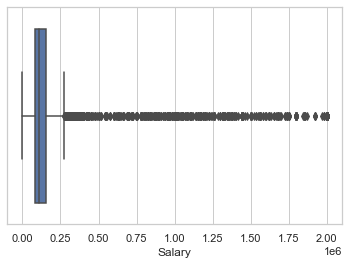

In [558]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=salaries)

In [565]:
first_quart = np.quantile(salaries, 0.25)
mid_quart = np.quantile(salaries, 0.5)
third_quart = np.quantile(salaries, 0.75)
IQR = np.quantile(salaries, 0.75) - np.quantile(salaries, 0.25)
Outlier_high = (IQR*1.5) + third_quart
Outlier_low = (IQR*1.5) - first_quart
Outlier_low, Outlier_high

(37000.0, 275000.0)

In [566]:
low = dev_df['Salary'] > Outlier_low
high = dev_df['Salary'] < Outlier_high

In [567]:
dev_df = dev_df[low]
dev_df = dev_df[high]

<ipython-input-567-28d0f6f7258c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dev_df = dev_df[high]


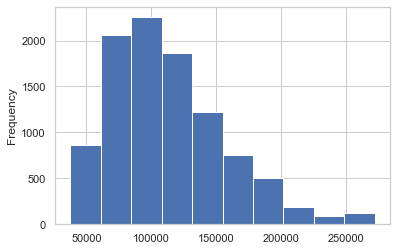

In [568]:
dev_df['Salary'].plot(kind='hist')

In [569]:
dev_df['Salary'].min(), dev_df['Salary'].median(), round(dev_df['Salary'].mean()), dev_df['Salary'].max()

(37600.0, 105000.0, 113170.0, 272313.0)

In [570]:
dev_df.to_csv('dev_df.csv')